# Patching `input()` for notebook

In [1]:
input_buffer = []


def set_input_buffer(input_string):
  global input_buffer
  input_buffer = input_string.strip().split('\n')


def input():
  if input_buffer:
    return input_buffer.pop(0)
  else:
    raise Exception("input buffer is empty")

# Utility functions

In [2]:
def print_adj_list(adjacency_list):
  # https://csacademy.com/app/graph_editor/
  edges = []
  for node, neighbors in adjacency_list.items():
    for neighbor in neighbors:
      if type(neighbor) == tuple:
        edges.append((node, neighbor[0], neighbor[1]))
      else:
        edges.append((node, neighbor))
  edges.sort()

  display(None)

  # print nodes
  for node in sorted(adjacency_list):
    print(node)

  # print edges
  for edge in edges:
    print(' '.join(map(str, edge)))


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
print_adj_list(adjacency_list)

adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(3, 15), (2, 4)],
    2: [(3, 11)],
    3: []
}
print_adj_list(adjacency_list)

None

0
1
2
3
4
0 1
0 2
1 3
1 4
2 3
2 4
3 4


None

0
1
2
3
0 1 10
0 2 6
1 2 4
1 3 15
2 3 11


In [3]:
def is_weighted(adjacency_list):
  """ determine if the adjacency list is weighted """

  return any(neighbors and type(neighbors[0]) == tuple for neighbors in adjacency_list.values())

In [4]:
def add_edge(adjacency_list, u, v, w=None):
  """ add an edge u-v to the adjacency list if it doesn't already exist.
  if w is not none, the adjacency list is assumed to be weighted. """

  if w is not None:  # weighted adjacency list
    if not any(adj_vertex == v for adj_vertex, _ in adjacency_list[u]):
      adjacency_list[u].append((v, w))
  else:  # unweighted adjacency list
    if v not in adjacency_list[u]:
      adjacency_list[u].append(v)

In [5]:
def get_undirected(adjacency_list):
  """ convert a directed adjacency list to an undirected adjacency list. """

  weighted = is_weighted(adjacency_list)

  # copy the original adjacency list
  undirected_list = {node: neighbors[:] for node, neighbors in adjacency_list.items()}

  # add missing reverse edges
  for node in adjacency_list:
    for neighbor_info in adjacency_list[node]:
      if weighted:
        neighbor, weight = neighbor_info
        add_edge(undirected_list, neighbor, node, weight)
      else:
        neighbor = neighbor_info
        add_edge(undirected_list, neighbor, node)

  # sort neighbors of each node
  for node in undirected_list:
    undirected_list[node].sort()

  return undirected_list


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
get_undirected(adjacency_list)

adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(3, 15), (2, 4)],
    2: [(3, 11)],
    3: []
}
get_undirected(adjacency_list)

{0: [1, 2], 1: [0, 3, 4], 2: [0, 3, 4], 3: [1, 2, 4], 4: [1, 2, 3]}

{0: [(1, 10), (2, 6)],
 1: [(0, 10), (2, 4), (3, 15)],
 2: [(0, 6), (1, 4), (3, 11)],
 3: [(1, 15), (2, 11)]}

In [6]:
def get_vertices(edges):
  # extracts unique vertices from a list of edges.
  vertices = set()
  for edge in edges:
    vertices.add(edge[0])
    vertices.add(edge[1])
  return vertices


edges = [(0, 1), (0, 2), (1, 2), (1, 4)]
get_vertices(edges)

edges = [(0, 1, 10), (0, 2, 80), (1, 2, 6), (1, 4, 20)]
get_vertices(edges)

{0, 1, 2, 4}

{0, 1, 2, 4}

In [7]:
def create_adjacency_list(edges, vertices=set()):
  vertices = vertices | get_vertices(edges)
  adjacency_list = {u: [] for u in sorted(vertices)}

  for edge in edges:
    if len(edge) == 3:
      u, v, w = edge
      adjacency_list[u].append((v, w))
    else:
      u, v = edge
      adjacency_list[u].append(v)

  return adjacency_list


edges = [(0, 1), (0, 2), (1, 2), (1, 4)]
create_adjacency_list(edges)

edges = [(0, 1, 10), (0, 2, 80), (1, 2, 6), (1, 4, 20)]
create_adjacency_list(edges)

{0: [1, 2], 1: [2, 4], 2: [], 4: []}

{0: [(1, 10), (2, 80)], 1: [(2, 6), (4, 20)], 2: [], 4: []}

In [8]:
def print_ufs(ufs):
  adjacency_list = {u: [v] for u, v in ufs.parent.items()}
  print_adj_list(adjacency_list)


def print_mst(mst):
  print_adj_list(create_adjacency_list(mst))

In [9]:
def parse_csa_graph(graph_text):
  # https://csacademy.com/app/graph_editor/
  graph_text = graph_text.strip().split('\n')
  vertices = set()
  edges = []

  for line in graph_text:
    line = line.strip().split()

    for i, value in enumerate(line):
      if value.isdigit():
        line[i] = int(value)

    if len(line) == 1:
      vertices.add(line[0])
    else:
      edges.append(tuple(line))

  return create_adjacency_list(edges, vertices)


parse_csa_graph("""
A B
B C
""")

{'A': ['B'], 'B': ['C'], 'C': []}

# Demo adjacency lists

In [10]:
adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}

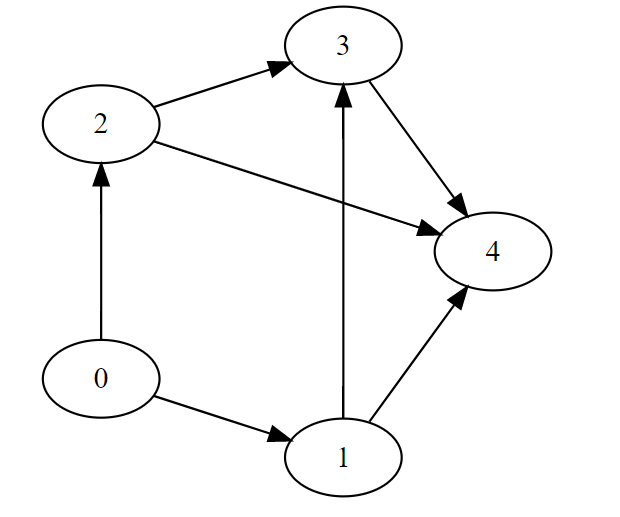

In [11]:
adjacency_list = {
    1: [2, 3, 7],
    2: [4, 7],
    3: [5, 7],
    4: [6],
    5: [6],
    7: [6],
    6: []
}

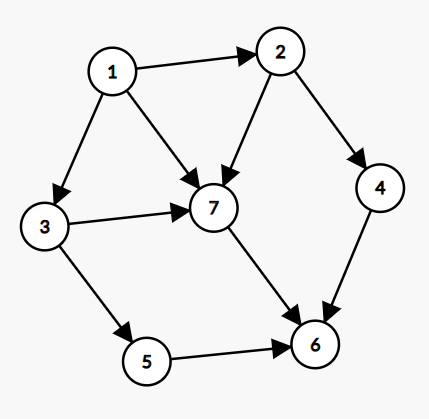

In [12]:
adjacency_list = {
    'A': ['B'],
    'B': ['C', 'D'],
    'C': ['A'],
    'D': [],
    'E': ['F'],
    'F': [],
}

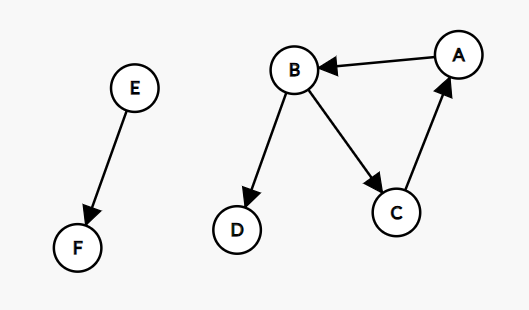

In [13]:
adjacency_list = {
    0: [1, 2],
    1: [3, 4],
    2: [],
    3: [],
    4: [],
    5: [],
}

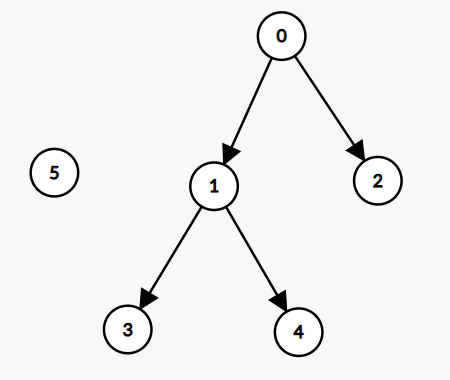

In [14]:
adjacency_list = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ['D'],
    'D': [],
    'E': ['F'],
    'F': ['G'],
    'G': [],
    'H': []
}

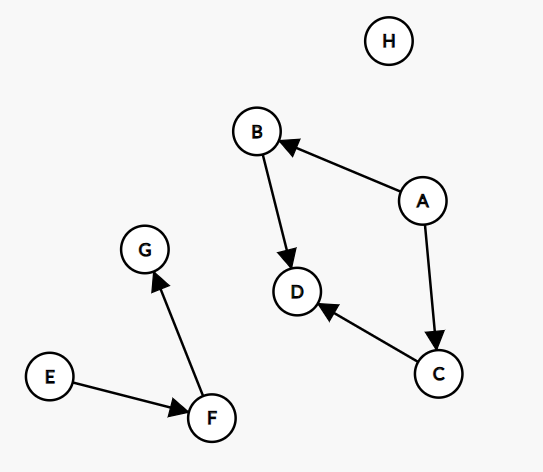

In [15]:
adjacency_list = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['E', 'F'],
    'D': ['X'],
    'E': ['D', 'M'],
    'F': [],
    'X': [],
    'M': [],
}

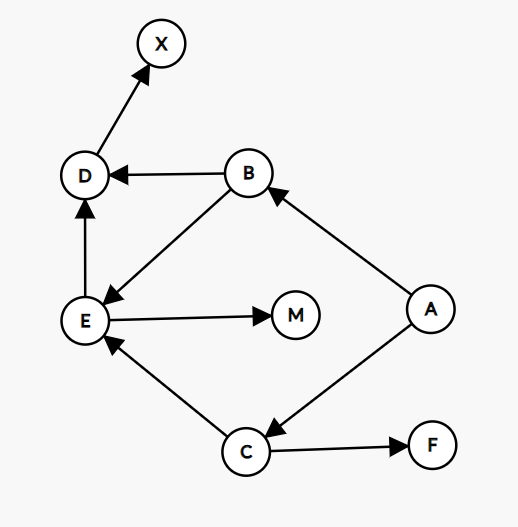

In [16]:
adjacency_list = {'A': ['F', 'M', 'B'],
                  'B': ['C'],
                  'C': ['D'],
                  'D': ['E'],
                  'E': ['F'],
                  'F': [],
                  'M': []}

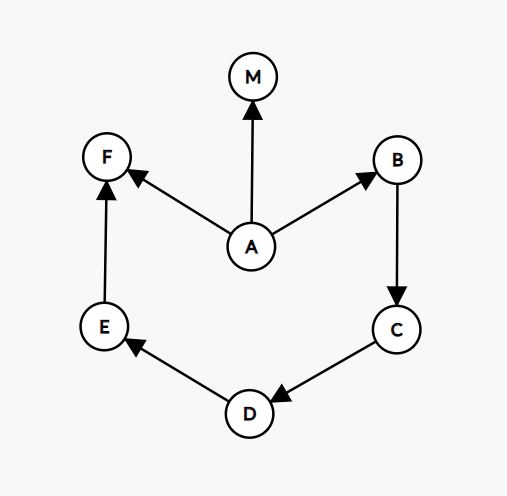

# Week 4 🌿

🚨 **Using shorter variable names for faster coding in OPPE**

# BFS [✅]

In [17]:
def bfs(adj_list, start):
  pass
  # visited, order, queue = [start]
  # while queue:
  #     u = pop front
  #     if not visited[u], visit u, append to order
  #     for each unvisited v in adj_list[u]: enqueue v
  # return order

In [18]:
def bfs(adj_list, start):
  visited = {u: False for u in adj_list}
  order = []

  queue = [start]
  while queue:
    u = queue.pop(0)
    if not visited[u]:
      visited[u] = True
      order.append(u)

      for v in adj_list[u]:
        if not visited[v]:
          queue.append(v)
  return order


adj_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs(adj_list, 0)

[0, 1, 2, 3, 4]

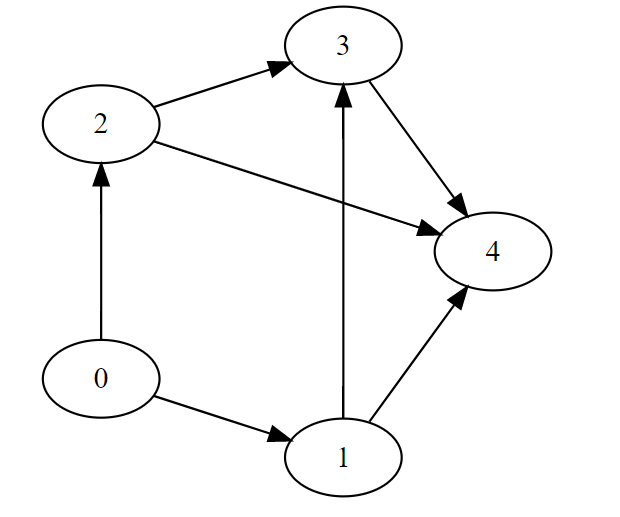

# DFS [✅]

In [19]:
def dfs(adj_list, start):
  pass
  # visited, order, stack = [start]
  # while stack:
  #     u = pop top
  #     if not visited[u], visit u, append to order
  #     for each unvisited v in adj_list[u]: push v
  # return order

In [20]:
def dfs(adj_list, start):
  visited = {u: False for u in adj_list}
  order = []

  stack = [start]
  while stack:
    u = stack.pop()
    if not visited[u]:
      visited[u] = True
      order.append(u)

      for v in adj_list[u]:  # or reversed(adj_list[u])
        if not visited[v]:
          stack.append(v)
  return order


adj_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs(adj_list, 0)

[0, 2, 3, 4, 1]

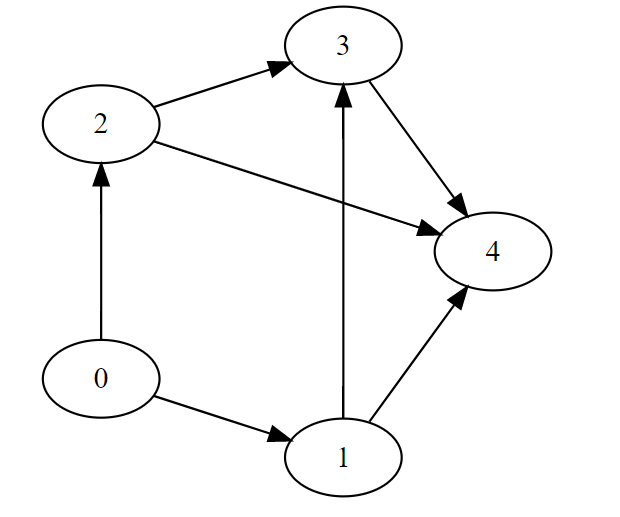

# BSF with parent, level [✅]

In [21]:
def bfs(adj_list, start):
  pass
  # visited, parent, level, order, queue = [start]
  # while queue:
  #     u = pop front
  #     if not visited[u], visit u, append to order
  #     for each unvisited v in adj_list[u]:
  #         enqueue v
  #         if parent[v] is None: set parent[v] = u, level[v] = level[u]+1
  # return order, parent, level

In [22]:
def bfs(adj_list, start):
  visited = {u: False for u in adj_list}
  parent = {u: None for u in adj_list}
  level = {u: 0 for u in adj_list}
  order = []

  queue = [start]
  while queue:
    u = queue.pop(0)
    if not visited[u]:
      visited[u] = True
      order.append(u)

      for v in adj_list[u]:
        if not visited[v]:
          queue.append(v)

          if parent[v] is None:
            parent[v] = u
            level[v] = level[u]+1

  return order, parent, level


adj_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs(adj_list, 0)

([0, 1, 2, 3, 4],
 {0: None, 1: 0, 2: 0, 3: 1, 4: 1},
 {0: 0, 1: 1, 2: 1, 3: 2, 4: 2})

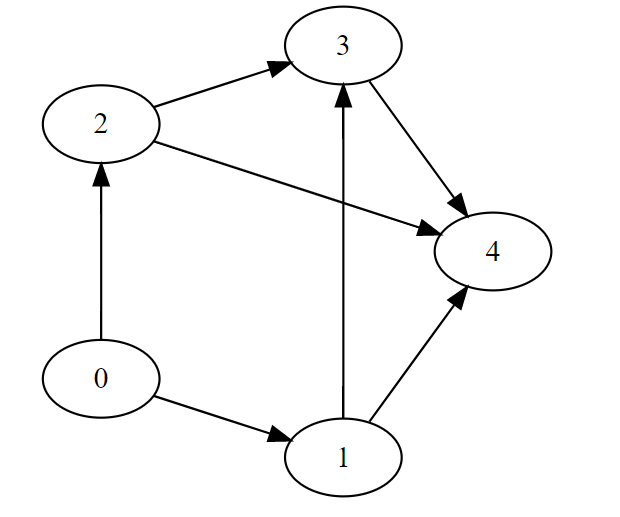

# DFS recursive

In [23]:
def dfs_recursive(adjacency_list, curr_vertex, visited=None, order=None):
  pass
  # if visited is None: init visited and order
  # mark curr_vertex visited, append to order
  # for each unvisited adj_vertex: recurse
  # return visited, order

# Parent, level info (DFS recursive)

In [24]:
def dfs_recursive(adjacency_list, curr_vertex, visited=None, order=None, parent=None, level=None):
  pass
  # if visited is None: init visited, parent, level, order
  # mark curr_vertex visited, append to order
  # for each unvisited adj_vertex:
  #     if parent[adj_vertex] is None:
  #         set parent, update level
  #     recurse
  # return visited, order, parent, level

# Find Connected Components in graph using BFS

In [25]:
def bfs(adjacency_list, start_vertex, visited):
  pass
  # init queue with start_vertex, component = []
  # while queue not empty:
  #     curr_vertex = dequeue
  #     if not visited[curr_vertex]: mark visited, add to component
  #     for each unvisited adj_vertex: enqueue
  # return component


def find_connected_components(adjacency_list):
  pass
  # init visited, components = []
  # for each vertex:
  #     if not visited: run bfs, add result to components
  # return components

# Pre and Post Numbering Using DFS

In [26]:
def dfs(adjacency_list, curr_vertex, visited, pre, post, counter):
  pass
  # mark curr_vertex visited
  # set pre[curr_vertex] to counter, increment counter
  # for each unvisited adj_vertex: recurse
  # set post[curr_vertex] to counter, increment counter


def pre_post_numbering(adjacency_list):
  pass
  # init visited, pre, post, counter
  # for each vertex:
  #     if not visited: run dfs
  # return pre, post

# DAG Topological Sort

In [27]:
def dfs(adjacency_list, curr_vertex, visited, stack):
  pass
  # mark curr_vertex visited
  # for each unvisited neighbor: recurse
  # append curr_vertex to stack


def topological_sort(adjacency_list):
  pass
  # init visited, stack
  # for each vertex:
  #     if not visited: run dfs
  # return reversed stack

# DAG Longest path

In [28]:
def longest_path(adjacency_list, start_vertex):
  pass
  # get topological_order
  # init distance, set start_vertex distance to 0
  # for each parent in topological_order:
  #     if parent has distance: update children distance
  # return distance
  # (optionally: return max distance)

# Old 🤷👇

# GrPA 1 🔫

In [29]:
def parse_my_input(my_input):
  data = my_input.strip().split('\n')

  n = int(data[0])
  adjacency_matrix = [list(map(int, data[i+1].split())) for i in range(n)]
  px = int(data[-2])
  py = int(data[-1])

  return n, adjacency_matrix, px, py

In [30]:
def convert_adj_matrix_to_list(adj_matrix):
  pass
  # create empty list for each node
  # if adj_matrix[i][j] == 1, append j to i's list
  # return adj_list


def bfs(adj_list, start):
  pass
  # visited, parent, level, queue = [start]
  # while queue:
  #     u = pop front
  #     if not visited[u], visit and record
  #     for v in adj_list[u]:
  #         if not visited[v]: enqueue, set parent, update level
  # return level


def find_connection_level(n, adj_matrix, px, py):
  pass
  # adj_list = convert_adj_matrix_to_list(adj_matrix)
  # level = bfs(adj_list, px)
  # return level[py]

In [31]:
# Sol 👇
def convert_adj_matrix_to_list(adj_matrix):
  n = len(adj_matrix)
  adj_list = {i: [] for i in range(n)}

  for i in range(n):
    for j in range(n):
      if adj_matrix[i][j] == 1:
        adj_list[i].append(j)

  return adj_list


def bfs(adj_list, start):
  visited = {u: False for u in adj_list}
  parent = {u: None for u in adj_list}
  level = {u: 0 for u in adj_list}

  queue = [start]
  while queue:
    u = queue.pop(0)
    if not visited[u]:
      visited[u] = True

      for v in adj_list[u]:
        if not visited[v]:
          queue.append(v)

          if parent[v] is None:
            parent[v] = u
            level[v] = level[u]+1
  return level


def find_connection_level(n, adj_matrix, px, py):
  adj_list = convert_adj_matrix_to_list(adj_matrix)  # helper
  level = bfs(adj_list, px)  # helper
  return level[py]


# Gray code 👇
find_connection_level(*parse_my_input("""
15
0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
1 0 1 1 1 1 0 0 0 0 0 0 0 0 0
1 1 0 1 1 1 0 0 0 0 0 0 0 0 0
0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
0 1 1 1 0 1 0 0 0 0 0 0 0 0 0
0 1 1 0 1 0 1 0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
12
13
"""))

3

# GrPA 2 🔫

**1. BFS**
- Explore network from start tank, mark reachable tanks.

**2. Make adjacency list**
- Convert pipes to adjacency list.

**3. Check each tank**
- Run BFS from each tank, check reachability.

**4. Return master tank**
- Return tank if it reaches all others; else return 0.

In [32]:
def bfs(adj_list, start):
  pass
  # visited, order, queue = [start]
  # while queue:
  #     u = pop front
  #     if not visited[u], visit u, append to order
  #     for each unvisited v in adj_list[u]: enqueue v
  # return order


def find_master_tank(tanks, pipes):
  pass
  # create `adjacency_list` from `pipes`.
  # for each vertex:
  #   run `bfs`; if all vertices visited, return vertex.
  # return 0 if no master tank found.

# New 🆕👇

# PPA 1 🔫

In [33]:
def parse_ppa1(my_input: str):
  data = my_input.strip().split('\n')
  vertices = data[0].split()
  edges = data[2:]
  edges = [tuple(edge.split()) for edge in edges]
  return vertices, edges

In [34]:
def make_adj_list(vertices, edges):
  adj_list = {u: [] for u in vertices}
  for u, v in edges:
    adj_list[u].append(v)
    adj_list[v].append(u)
  return adj_list


def bfs(adj_list, start, visited):
  component = []

  queue = [start]
  while queue:
    curr = queue.pop(0)

    if not visited[curr]:
      visited[curr] = True
      component.append(curr)

      for v in adj_list[curr]:
        if not visited[v]:
          queue.append(v)

  return component


def findComponents_undirectedGraph(vertices, edges):
  adj_list = make_adj_list(vertices, edges)  # helper
  visited = {u: False for u in adj_list}
  components = []

  for u in adj_list:
    if not visited[u]:
      component = bfs(adj_list, u, visited)  # helper
      components.append(component)
  return len(components)


findComponents_undirectedGraph(*parse_ppa1(""" 
a b c d e f g h i j
7
a c
c d
c g
e f
e h
f h
b i"""))

4

# PPA 2 🔫

In [146]:
def add(a, b, data=[]):
  data.append(a + b)
  return data


add(4, 6)
add(4, 6)
add(4, 6)

[10]

[10, 10]

[10, 10, 10]

In [35]:
def parse_ppa2(my_input: str):
  data = my_input.strip().split('\n')
  vertices = data[0].split()
  adj_list = {u: [] for u in vertices}
  for index, u in enumerate(vertices):
    for v in data[index+1].split():
      if v:
        adj_list[u].append(v)
  source = data[-2]
  destination = data[-1]
  return vertices, adj_list, source, destination

In [147]:
def bfs(adj_list, start):  # standard bfs
  predecessor = {u: [] for u in adj_list}  # NEW
  visited = {u: False for u in adj_list}
  queue = [start]

  while queue:
    u = queue.pop(0)
    if not visited[u]:
      visited[u] = True
      for v in adj_list[u]:
        predecessor[v].append(u)  # NEW
        if not visited[v]:
          queue.append(v)
  return predecessor


def reconstruct_all_paths(predecessor, source, destination, path, payload):
  path.append(destination)

  if destination == source:
    payload.append(''.join(reversed(path)))
    return payload

  for u in predecessor[destination]:
    if u not in path:  # dealing with cycles
      new_path = path.copy()
      reconstruct_all_paths(predecessor, source, u, new_path, payload)
  return payload


def findAllPaths(vertices, adj_list, source, destination):
  predecessor = bfs(adj_list, source)
  all_paths = reconstruct_all_paths(predecessor, source, destination, [], [])
  return all_paths


findAllPaths(*parse_ppa2(""" 
a b c d e f g h i j
c
i
d g

f h
h




b
d """))

[]

# `reconstruct_all_paths()` as a separate problem

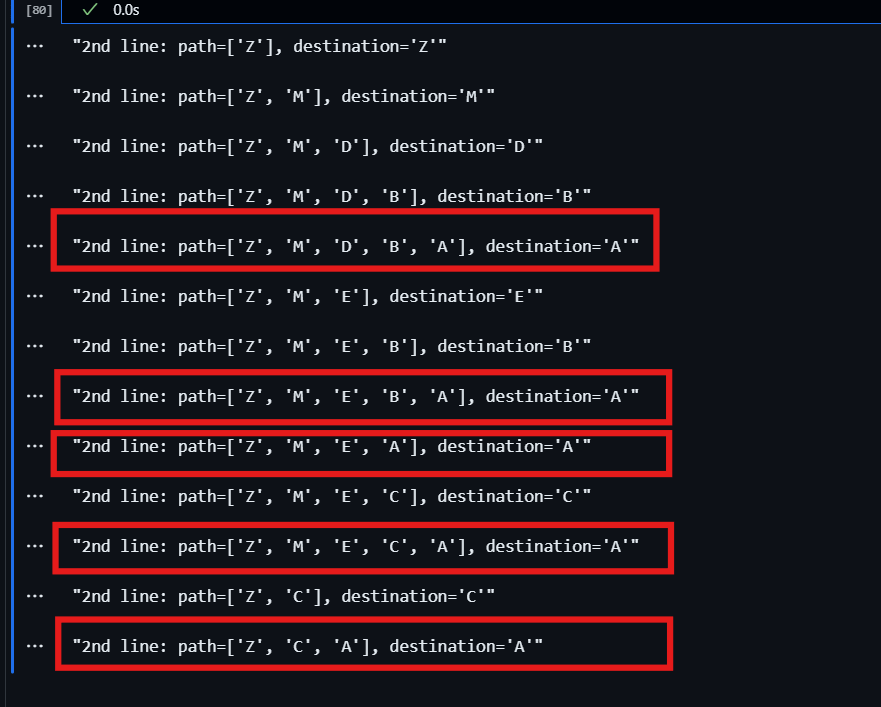

**payload:**
- the load carried by a vehicle exclusive of what is necessary for its operation.

In [149]:
def reconstruct_all_paths(predecessor, source, destination, path, payload):
  path.append(destination)
  display(f'2nd line: {path=}, {destination=}')

  if destination == source:
    print('boom, gotcha!')
    payload.append(''.join(path))
    return

  for u in predecessor[destination]:
    if u not in path:
      new_path = path.copy()
      reconstruct_all_paths(predecessor, source, u, new_path, payload)

  return payload


predecessor = {
    'A': [],
    'B': ['A'],
    'C': ['A'],
    'D': ['B'],
    'E': ['B', 'A', 'C'],
    'M': ['D', 'E'],
    'Z': ['M', 'C'],
}

reconstruct_all_paths(predecessor, 'A', 'Z', [], [])

"2nd line: path=['Z'], destination='Z'"

"2nd line: path=['Z', 'M'], destination='M'"

"2nd line: path=['Z', 'M', 'D'], destination='D'"

"2nd line: path=['Z', 'M', 'D', 'B'], destination='B'"

"2nd line: path=['Z', 'M', 'D', 'B', 'A'], destination='A'"

boom, gotcha!


"2nd line: path=['Z', 'M', 'E'], destination='E'"

"2nd line: path=['Z', 'M', 'E', 'B'], destination='B'"

"2nd line: path=['Z', 'M', 'E', 'B', 'A'], destination='A'"

boom, gotcha!


"2nd line: path=['Z', 'M', 'E', 'A'], destination='A'"

boom, gotcha!


"2nd line: path=['Z', 'M', 'E', 'C'], destination='C'"

"2nd line: path=['Z', 'M', 'E', 'C', 'A'], destination='A'"

boom, gotcha!


"2nd line: path=['Z', 'C'], destination='C'"

"2nd line: path=['Z', 'C', 'A'], destination='A'"

boom, gotcha!


['ZMDBA', 'ZMEBA', 'ZMEA', 'ZMECA', 'ZCA']

# PPA 3 🔫

# GrPA 1 🔫

# GrPA 2 🔫

# GrPA 3 🔫

# Week 5 🌿

# Dijkstra's Algorithm

1. **Initialization**:
   - `visited`; `distance` (start_vertex: 0); `PriorityQueue` (pq with start_vertex).

2. **Until queue empty**:
   - Dequeue `current_vertex`; mark visited.
   - For each unvisited neighbor:
     - Calculate `new_distance`.
     - If shorter: update distance; enqueue neighbor.

3. **Result**:
   - Return `distance` (shortest paths from start_vertex).

# Bellman-Ford Algorithm

1. **Initialization**:
   - `distance` (start_vertex: 0); others: `inf`.

2. **Relax all edges |V|-1 times**:
   - For each vertex and neighbors:
     - Update `distance[neighbor]` if shorter path found.

3. **Negative-Weight Cycle Check (optional)**:
   - Check all edges once more:
     - Raise error if shorter path still found.

4. **Result**:
   - `distance` (shortest paths) or error (negative-weight cycle).

# Floyd-Warshall Algorithm

1. **Initialization**:
   - `dist[i][j]` (edge weight or `inf`); `dist[i][i]` = 0.

2. **Triple nested loop**:
   - For each `k`: 
     - For each `i` and `j`: 
       - Update `dist[i][j]` if `dist[i][k] + dist[k][j]` is shorter.

3. **Result**:
   - `dist` (shortest paths between all pairs).

# Prim's Algorithm

1. **Initialization**:
   - Empty `mst`; `pq` (edges by weight); `visited` (False).

2. **Processing**:
   - Enqueue edges from `start_vertex` into `pq`.
   - Mark `start_vertex` visited.
   - While `pq` not empty:
     - Dequeue `(weight, (u, v))`.
     - If `v` unvisited:
       - Add `(u, v, weight)` to `mst`.
       - Mark `v` visited.
       - Enqueue `v`'s edges if `next_neighbor` unvisited.

3. **Result**:
   - `mst` (minimum-weight spanning tree).

# Kruskal's Algorithm

1. **Initialization**:
   - Empty `mst`; `edges` (sorted by weight).

2. **Union-Find**:
   - `parent` (each vertex as its own parent); `find(node)` for root.

3. **Process Edges**:
   - For each edge `(weight, u, v)`:
     - Find roots `root1`, `root2` of `u`, `v`.
     - If roots differ:
       - Merge (`parent[root2] = root1`).
       - Add `(u, v, weight)` to `mst`.

4. **Result**:
   - `mst` (minimum-weight spanning tree).

# GrPA 1 🔫

# GrPA 2 🔫

# GrPA 3 🔫

# PPA 1 🔫

# PPA 2 🔫

# Week 6 🌿

# Kruskal's Algorithm using UnionFind

1. **UnionFind Class**:
   - `__init__(vertices)`: `parent` (each vertex as its own parent).
   - `find(node)`: find root parent.
   - `union(u, v)`: merge sets; return `True` if merged.

2. **Kruskal**:
   - Empty `mst`; `edges` (sorted by weight).
   - For each edge `(weight, u, v)`:
     - If `union(u, v)` (different sets): add `(u, v, weight)` to `mst`.

3. **Result**:
   - `mst` (minimum-weight spanning tree).

# MaxHeap

**`__init__(self, H, method='one_by_one')`**:
  - Initialize empty heap; build heap by method.

**`insert(self, value)`**:
  - Append `value`; call `_heapify_up(last index)`.

**`delete(self)`**:
  - Return `None` if empty; swap root with last; remove last; call `_heapify_down(0)`; return root.

**`_build_heap_one_by_one(self, H)`**:
  - For each in `H`, call `insert(value)`.

**`_build_heap_heapify(self, H)`**:
  - Set heap to `H`; call `_heapify_down(index)` from middle to 0.

**`_heapify_up(self, index)`**:
  - Swap with parent if larger; recurse.

**`_heapify_down(self, index)`**:
  - Swap with largest child if larger; recurse.

**`_swap(self, i, j)`**:
  - Swap `heap[i]` and `heap[j]`.

**`print_heap(self)`**:
  - Print heap as space-separated list.

# MinHeap

#### Same Methods as MaxHeap
- `__init__(self, H, method='one_by_one')`
- `insert(self, value)`
- `delete(self)`
- `_build_heap_one_by_one(self, H)`
- `_build_heap_heapify(self, H)`
- `_swap(self, i, j)`
- `print_heap(self)`

#### Different Methods for MinHeap
- **`_heapify_up(self, index)`**:
  - Swap with parent if smaller; recurse.

- **`_heapify_down(self, index)`**:
  - Swap with smallest child if smaller; recurse.

# Heapsort [using MinHeap]

**One new method to MinHeap: `heapsort(self)`**:
  - Copy heap; empty sorted list.
  - While heap not empty:
    - Delete root; add to sorted list.
  - Restore original heap.
  - Return sorted list.

# PriorityQueue [using MinHeap]

**`enqueue(self, priority, item)`:**
- Insert `(priority, item)`

**`dequeue(self)`:**
- Return `delete()`

# Dijkstra's Algorithm [using PriorityQueue]

1. **Initialization**:
   - `visited`: all `False`; `distance`: `inf`, `0` for `start_vertex`.
   - Create `pq`; enqueue `(0, start_vertex)`.

2. **Process Queue Until Empty**:
   - Dequeue `current_vertex`; mark `visited`.
   - For each neighbor:
     - If not visited; calculate `new_distance`.
     - If `new_distance` < `distance[neighbor]`:
       - Update `distance[neighbor]`.
       - Enqueue `(new_distance, neighbor)`.

3. **Result**:
   - Return `distance`.